In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default')
plt.rcParams['figure.figsize'] = (8,5)

sns.set(style="whitegrid")

pd.options.display.float_format = '{:20,.2f}'.format

import warnings
warnings.filterwarnings('ignore')

In [2]:
tweets = pd.read_csv("../data/train.csv")

In [3]:
#creo nueva columna con longitud del tweet
tweets["text_length"] = tweets["text"].str.len()
tweets.head()

,id,keyword,location,text,target,text_length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


In [4]:
tweets_verdaderos = tweets[tweets["target"]==1]
tweets_verdaderos_estad = tweets_verdaderos.describe()
tweets_verdaderos_estad["text_length"]

count               3,271.00
mean                  108.11
std                    29.31
min                    14.00
25%                    88.00
50%                   115.00
75%                   136.00
max                   151.00
Name: text_length, dtype: float64

In [17]:
print(tweets_verdaderos["text_length"].sum())
print(tweets_verdaderos["text_length"].median())

353639
115.0


Text(0, 0.5, 'Densidad')

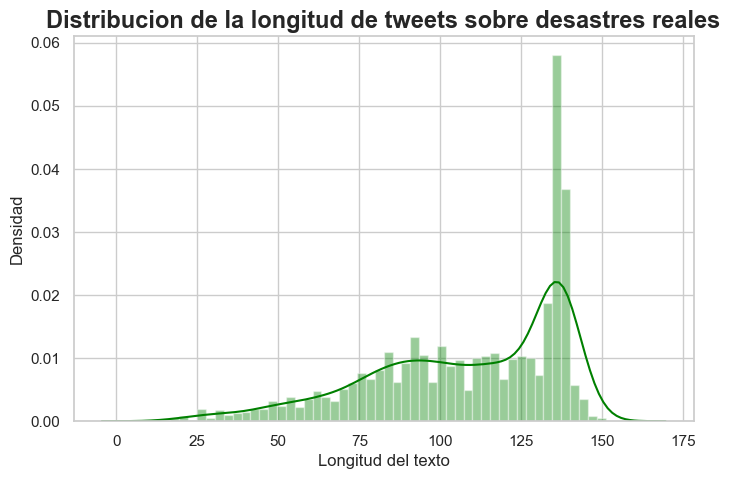

In [6]:
g = sns.distplot(tweets_verdaderos["text_length"], hist=True, color="green", bins=50)
g.set_title("Distribucion de la longitud de tweets sobre desastres reales", fontsize=17, fontweight="bold")
g.set_xlabel("Longitud del texto",fontsize=12)
g.set_ylabel("Densidad", fontsize=12)

In [8]:
tweets_falsos = tweets[tweets["target"]==0]
tweets_falsos_estad = tweets_falsos.describe()
tweets_falsos_estad["text_length"]

count               4,342.00
mean                   95.71
std                    35.89
min                     7.00
25%                    68.00
50%                   101.00
75%                   130.00
max                   157.00
Name: text_length, dtype: float64

In [18]:
print(tweets_falsos["text_length"].sum())
print(tweets_falsos["text_length"].median())

415559
101.0


Text(0, 0.5, 'Densidad')

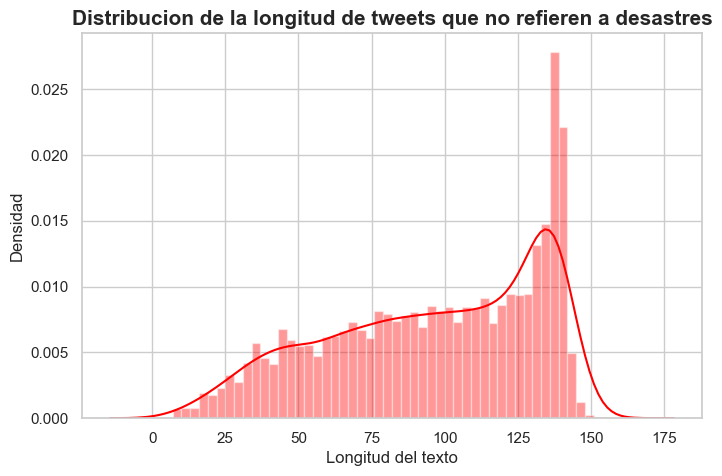

In [10]:
g = sns.distplot(tweets_falsos["text_length"], hist=True, color="red", bins=50)
g.set_title("Distribucion de la longitud de tweets que no refieren a desastres", fontsize=15, fontweight="bold")
g.set_xlabel("Longitud del texto",fontsize=12)
g.set_ylabel("Densidad", fontsize=12)

Text(0.5, 0, 'Longitud')

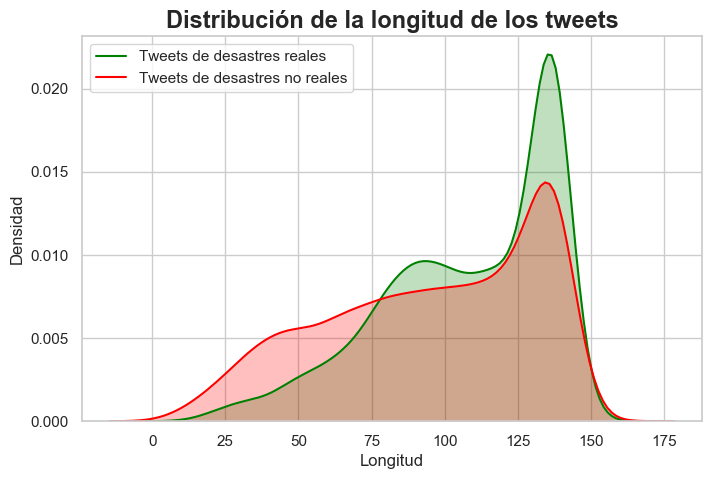

In [11]:
g = sns.kdeplot(tweets_verdaderos["text_length"], color="green", label="Tweets de desastres reales", shade=True)
g = sns.kdeplot(tweets_falsos["text_length"], color="red", label="Tweets de desastres no reales", shade=True)
g.set_title("Distribución de la longitud de los tweets", fontsize=17, fontweight="bold")
g.set_ylabel("Densidad", fontsize=12)
g.set_xlabel("Longitud", fontsize=12)

Text(0, 0.5, 'Longitud')

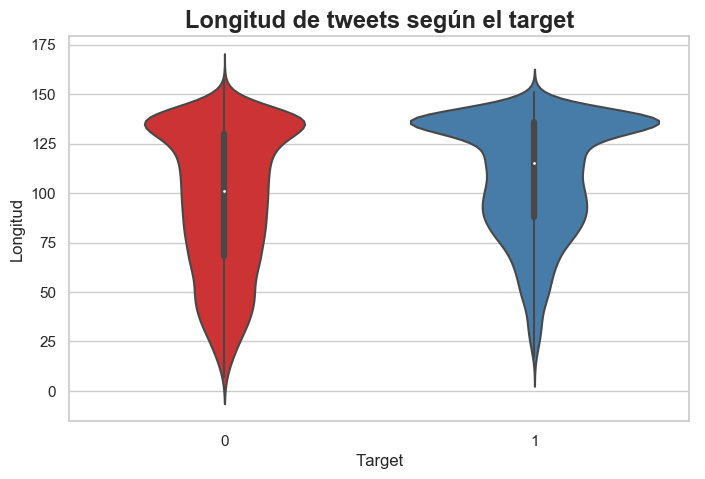

In [26]:
g = sns.violinplot(x="target", y="text_length", data= tweets, palette="Set1")
g.set_title("Longitud de tweets según el target", fontsize=17, fontweight="bold")
g.set_xlabel("Target", fontsize=12)
g.set_ylabel("Longitud", fontsize=12)

In [7]:
tweets.loc[:,["text","text_length"]].sort_values(by="text_length", ascending=False).head(10) #esto iria en la notebook de analisis por longitud
#tomar los tweets que sobrepasan la longitud promedio y hacer analisis sobre ello

,text,text_length
1270,when you're taking a shower and someone flushe...,157
4801,It's was about 2:30 in the morning&amp;I went ...,152
614,@CAgov If 90BLKs&amp;8WHTs colluded 2 take WHT...,151
635,@cspanwj If 90BLKs&amp;8WHTs colluded 2 take W...,150
633,@HowardU If 90BLKs&amp;8WHTs colluded 2 take W...,150
2718,@UN No more #GujaratRiot &amp; #MumbaiRiot92-9...,149
2301,Nah but srsly b4 u demolish ur partner's face ...,148
6945,@helene_yancey GodsLove &amp; #thankU my siste...,148
257,@willienelson We need help! Horses will die!Pl...,148
261,@Barbi_Twins We need help-horses will die! Ple...,148


In [8]:
tweets["text_length"].mean()

101.03743596479706

In [9]:
tweets_long_por_sobre_promedio = tweets[tweets["text_length"] > tweets["text_length"].mean()] 
len(tweets_long_por_sobre_promedio)

4141

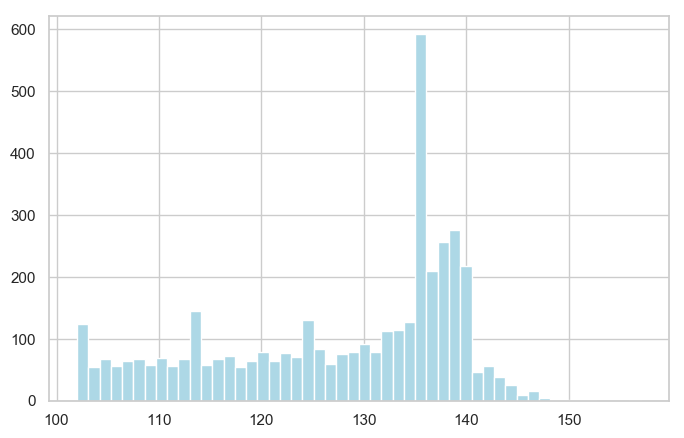

In [33]:
tweets_long_por_sobre_promedio["text_length"].hist(bins=50,color="lightblue")

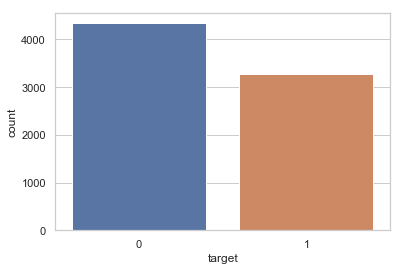

In [3]:
sns.countplot(tweets["target"])

In [13]:
#longitud de tweets segun keywords
top10_keywords = tweets["keyword"].value_counts().head(10).index.tolist()
top10_keywords

['fatalities',
 'deluge',
 'armageddon',
 'damage',
 'harm',
 'body%20bags',
 'sinking',
 'collided',
 'evacuate',
 'twister']

In [14]:
tweets_top10_keywords = tweets[tweets["keyword"].isin(top10_keywords)]
tweets_top10_keywords["keyword"] = tweets_top10_keywords["keyword"].str.replace('%20',' ')

[Text(0, 0, 'armageddon'),
 Text(0, 0, 'body bags'),
 Text(0, 0, 'collided'),
 Text(0, 0, 'damage'),
 Text(0, 0, 'deluge'),
 Text(0, 0, 'evacuate'),
 Text(0, 0, 'fatalities'),
 Text(0, 0, 'harm'),
 Text(0, 0, 'sinking'),
 Text(0, 0, 'twister')]

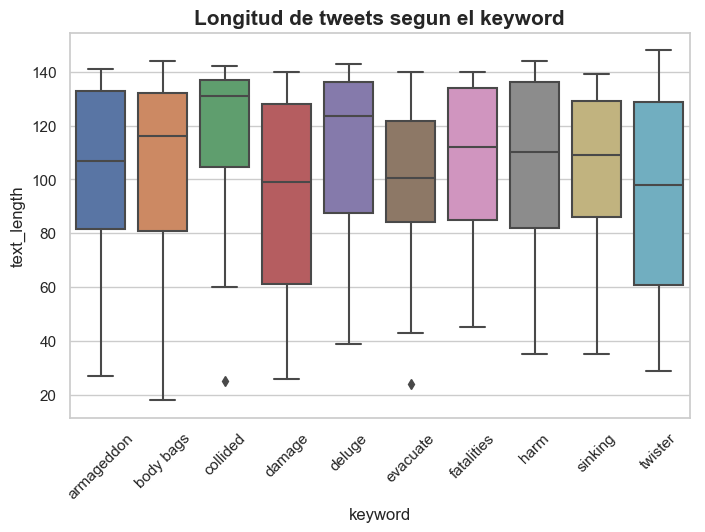

In [15]:
ax = sns.boxplot(x="keyword", y="text_length", data=tweets_top10_keywords)
ax.set_title("Longitud de tweets segun el keyword", fontsize=15, fontweight="bold")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

[Text(0, 0, 'armageddon'),
 Text(0, 0, 'body bags'),
 Text(0, 0, 'deluge'),
 Text(0, 0, 'fatalities'),
 Text(0, 0, 'sinking')]

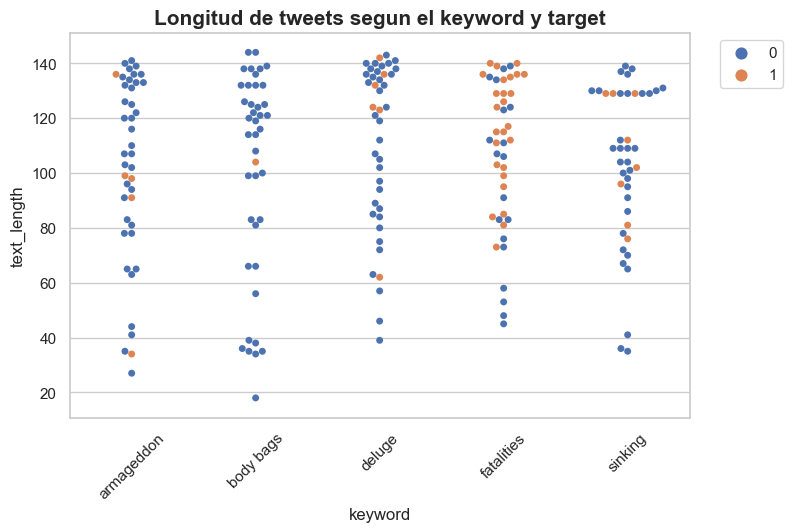

In [18]:
top5_keywords = tweets["keyword"].value_counts().head().index.tolist()
tweets_top5_keywords = tweets[tweets["keyword"].isin(top5_keywords)]
tweets_top5_keywords["keyword"] = tweets_top5_keywords["keyword"].str.replace('%20',' ')
ax = sns.swarmplot(x="keyword", y="text_length", hue="target", data=tweets_top5_keywords)
ax.set_title("Longitud de tweets segun el keyword y target", fontsize=15, fontweight="bold")
ax.legend(loc="upper center", bbox_to_anchor=(1.1,1))
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)